In [ ]:
#faylni o'qish
import pandas as pd
df=pd.read_csv("loan_details.csv")
df

,customer_id,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
0,10000,Personal,"$17,700",36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W
1,10001,mortgage,"$114,000",180,6.83,Refinance,0.774,Branch,1011,B
2,10002,Personal Loan,"9,300",36,13.99,Major Purchase,0.000,Online,1084,K
3,10003,PERSONAL,$8700,48,13.26,Medical,0.000,Online,1048,A
4,10004,Personal,"$7,200",24,10.77,Debt Consolidation,0.000,Branch,1055,S
...,...,...,...,...,...,...,...,...,...,...
89994,99994,personal,"$11,300",24,9.70,Home Improvement,0.000,Branch,1050,O
89995,99995,personal,"16,500",36,11.67,Other,0.000,Branch,1071,D
89996,99996,Personal Loan,"17,800",36,14.99,Major Purchase,0.000,Online,1046,J
89997,99997,Credit Card,$11700,0,19.10,Revolving Credit,0.000,Branch,997,K


In [20]:
# $ va , belgilarini olib tashlash va float ga o'tkazish
df['loan_amount'] = df['loan_amount'].str.replace(r'[\$,]', '', regex=True).astype(float)

# loan_type ustunini kichik harfga o'tkazish
df['loan_type'] = df['loan_type'].str.lower()

# Natijani tekshirish
print(df[['loan_amount', 'loan_type']].head())

df

   loan_amount      loan_type
0      17700.0       personal
1     114000.0       mortgage
2       9300.0  personal loan
3       8700.0       personal
4       7200.0       personal


,customer_id,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
0,10000,personal,17700.0,36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W
1,10001,mortgage,114000.0,180,6.83,Refinance,0.774,Branch,1011,B
2,10002,personal loan,9300.0,36,13.99,Major Purchase,0.000,Online,1084,K
3,10003,personal,8700.0,48,13.26,Medical,0.000,Online,1048,A
4,10004,personal,7200.0,24,10.77,Debt Consolidation,0.000,Branch,1055,S
...,...,...,...,...,...,...,...,...,...,...
89994,99994,personal,11300.0,24,9.70,Home Improvement,0.000,Branch,1050,O
89995,99995,personal,16500.0,36,11.67,Other,0.000,Branch,1071,D
89996,99996,personal loan,17800.0,36,14.99,Major Purchase,0.000,Online,1046,J
89997,99997,credit card,11700.0,0,19.10,Revolving Credit,0.000,Branch,997,K


In [21]:
# 'personal loan' ni 'personal' ga o'zgartirish
df['loan_type'] = df['loan_type'].replace('personal loan', 'personal')

# Tekshirish
print(df['loan_type'].value_counts())


loan_type
personal       36232
mortgage       23579
credit card    11195
home loan       7850
creditcard      5659
cc              5484
Name: count, dtype: int64


In [22]:
# loan_type ustunidagi kredit kartalarni 'creditcard' ga o'zgartirish
df['loan_type'] = df['loan_type'].replace({
    'credit card': 'creditcard',
    'cc': 'creditcard',
    'creditcard': 'creditcard'
})

# Tekshirish
print(df['loan_type'].value_counts())


loan_type
personal      36232
mortgage      23579
creditcard    22338
home loan      7850
Name: count, dtype: int64


In [ ]:
print(df['loan_term'].describe()) #loan_term ustunini tekshirish

count    89999.000000
mean       132.369204
std        152.657187
min          0.000000
25%         12.000000
50%         48.000000
75%        360.000000
max        360.000000
Name: loan_term, dtype: float64


In [ ]:
print(df['interest_rate'].describe()) #interest_rate ustunini tekshirish


count    89999.000000
mean        11.278835
std          4.607331
min          2.500000
25%          6.960000
50%         11.290000
75%         14.820000
max         22.800000
Name: interest_rate, dtype: float64


In [25]:
# loan_purpose ustunidagi noyob qiymatlar
print(df['loan_purpose'].unique())


['Debt Consolidation' 'Refinance' 'Major Purchase' 'Medical'
 'Revolving Credit' 'Home Improvement' 'Home Purchase' 'Other']


In [26]:
# origination_channel ustunidagi noyob qiymatlar
print(df['origination_channel'].unique())

['Direct Mail' 'Branch' 'Online' 'Broker']


In [ ]:
print("Noyob marketing_campaign kodlari:", df['marketing_campaign'].unique())    #marketing_campaign ustunidagi noyob qiymatlar

Noyob marketing_campaign kodlari: ['W' 'B' 'K' 'A' 'S' 'Q' 'J' 'U' 'I' 'T' 'E' 'Z' 'O' 'F' 'M' 'H' 'R' 'G'
 'D' 'Y' 'V' 'X' 'C' 'P' 'N' 'L']


In [30]:
# Tozalangan faylni new_cleaned_data.csv nomi bilan saqlash
df.to_csv("cleaned_loan_data.csv", index=False)

print("Fayl muvaffaqiyatli saqlandi!")


Fayl muvaffaqiyatli saqlandi!


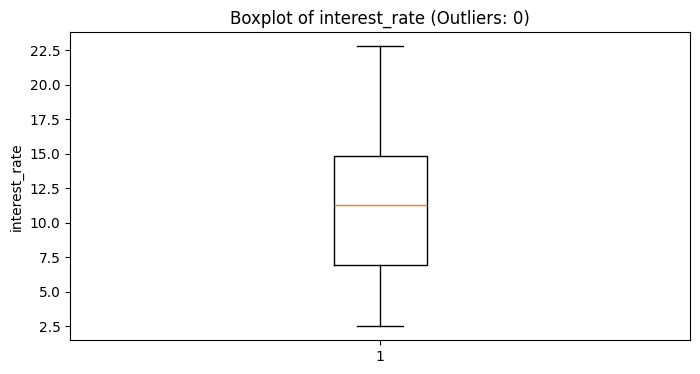

Column: interest_rate, Number of outliers: 0


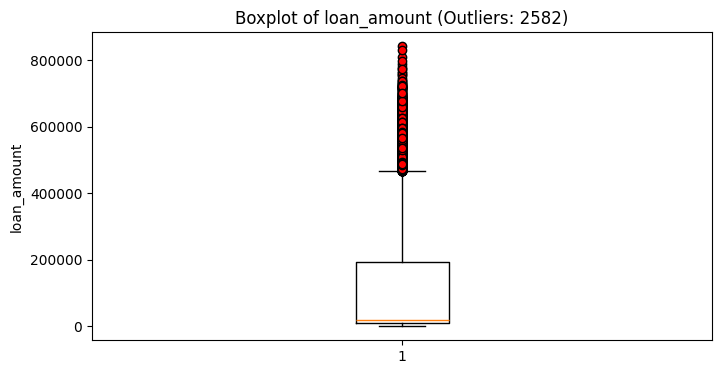

Column: loan_amount, Number of outliers: 2582


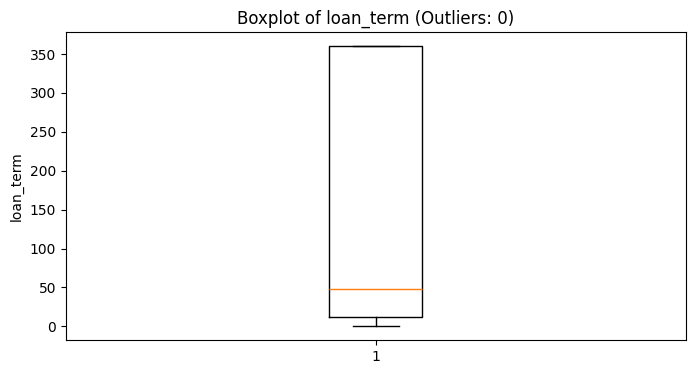

Column: loan_term, Number of outliers: 0


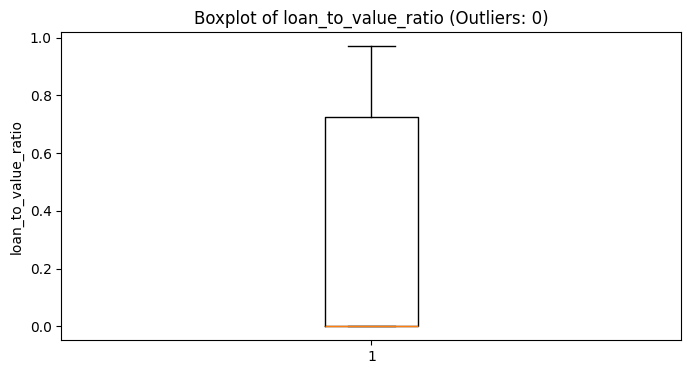

Column: loan_to_value_ratio, Number of outliers: 0


In [43]:
#Box Plot uchun

skip_cols = [col for col in df.columns if col.endswith('_id')]
numeric_cols = df.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
        
        plt.figure(figsize=(8,4))
        plt.boxplot(df[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
        plt.title(f'Boxplot of {col} (Outliers: {len(outliers)})')
        plt.ylabel(col)
        plt.show()
        print(f'Column: {col}, Number of outliers: {len(outliers)}')


In [51]:
df1=pd.read_csv("cleaned_loan_data.csv")
df1


,customer_id,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
0,10000,personal,17700.0,36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W
1,10001,mortgage,114000.0,180,6.83,Refinance,0.774,Branch,1011,B
2,10002,personal,9300.0,36,13.99,Major Purchase,0.000,Online,1084,K
3,10003,personal,8700.0,48,13.26,Medical,0.000,Online,1048,A
4,10004,personal,7200.0,24,10.77,Debt Consolidation,0.000,Branch,1055,S
...,...,...,...,...,...,...,...,...,...,...
89994,99994,personal,11300.0,24,9.70,Home Improvement,0.000,Branch,1050,O
89995,99995,personal,16500.0,36,11.67,Other,0.000,Branch,1071,D
89996,99996,personal,17800.0,36,14.99,Major Purchase,0.000,Online,1046,J
89997,99997,creditcard,11700.0,0,19.10,Revolving Credit,0.000,Branch,997,K


In [59]:
df1.columns

Index(['customer_id', 'loan_type', 'loan_amount', 'loan_term', 'interest_rate',
       'loan_purpose', 'loan_to_value_ratio', 'origination_channel',
       'loan_officer_id', 'marketing_campaign'],
      dtype='object')

In [52]:
df2=pd.read_csv("credit_history_cleaned.csv")
df2

,customer_id,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index
0,10000,696,14,22.8,273.6,169100,0,2,2,1,0,0.499
1,10001,659,13,3.5,42.0,78200,0,6,6,0,0,0.298
2,10002,662,3,0.0,0.0,41400,0,2,2,0,0,0.174
3,10003,676,8,9.0,108.0,60000,0,1,1,0,0,0.263
4,10004,678,7,8.0,96.0,49700,0,1,1,0,0,0.298
...,...,...,...,...,...,...,...,...,...,...,...,...
89994,99994,817,10,8.2,98.4,135600,0,1,1,0,0,0.285
89995,99995,745,9,8.8,105.6,44600,0,1,1,0,0,0.353
89996,99996,607,11,1.0,12.0,18300,0,2,2,1,0,0.238
89997,99997,678,10,3.0,36.0,54300,0,3,3,0,0,0.227


In [60]:
df2.columns

Index(['customer_id', 'credit_score', 'num_credit_accounts',
       'oldest_credit_line_age', 'oldest_account_age_months',
       'total_credit_limit', 'num_delinquencies_2yrs', 'num_inquiries_6mo',
       'recent_inquiry_count', 'num_public_records', 'num_collections',
       'account_diversity_index'],
      dtype='object')

In [53]:
df3=pd.read_csv("demographics_cleaned.csv")
df3

,customer_id,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents
0,10000,41,61800,2.2,Full Time,Graduate,Married,2
1,10001,38,28600,7.0,Full Time,High School,Married,0
2,10002,18,20700,0.8,Full Time,Bachelor,Single,0
3,10003,27,31400,4.8,Full Time,Bachelor,Single,0
4,10004,26,24600,5.2,Full Time,High School,Single,0
...,...,...,...,...,...,...,...,...
89994,99994,52,72300,3.7,Full Time,Bachelor,Single,1
89995,99995,61,20000,4.2,Full Time,High School,Divorced,1
89996,99996,19,20000,1.5,Full Time,High School,Married,3
89997,99997,21,20000,3.5,Full Time,High School,Married,1


In [61]:
df3.columns

Index(['customer_id', 'age', 'annual_income', 'employment_length',
       'employment_type', 'education', 'marital_status', 'num_dependents'],
      dtype='object')

In [57]:
df4=pd.read_csv("financial_ratios_cleaned.csv")
df4

,customer_id,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow
0,10000,5150.00,738.64,592.13,0.258,0.258402,0.115,0.841,142213.1,142213.1,26886.9,1330.77,15969.24,0.286408,159913.1,3819.230000
1,10001,2383.33,392.21,1013.86,0.590,0.589959,0.425,0.971,75932.2,75932.2,2267.8,1406.07,16872.84,3.986014,189932.2,977.260000
2,10002,1725.00,204.07,317.81,0.303,0.302539,0.184,0.539,22314.6,22314.6,19085.4,521.88,6262.56,0.449275,31614.6,1203.120000
3,10003,2616.67,288.71,234.52,0.200,0.199961,0.090,0.147,8820.0,8820.0,51180.0,523.23,6278.76,0.277070,17520.0,2093.436667
4,10004,2050.00,248.77,334.81,0.285,0.284673,0.163,0.488,24253.6,24253.6,25446.4,583.58,7002.96,0.292683,31453.6,1466.420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89994,99994,6025.00,2120.97,519.87,0.438,0.438314,0.086,0.359,48680.4,48680.4,86919.6,2640.84,31690.08,0.156293,59980.4,3384.160000
89995,99995,1666.67,138.97,545.44,0.411,0.410646,0.327,0.355,15833.0,15833.0,28767.0,684.41,8212.92,0.825000,32333.0,982.260000
89996,99996,1666.67,129.90,616.96,0.448,0.448116,0.370,0.669,12242.7,12242.7,6057.3,746.86,8962.32,0.890000,30042.7,919.806667
89997,99997,1666.67,162.11,351.00,0.308,0.307866,0.211,0.562,30516.6,30516.6,23783.4,513.11,6157.32,0.585000,42216.6,1153.560000


In [62]:
df4.columns

Index(['customer_id', 'monthly_income', 'existing_monthly_debt',
       'monthly_payment', 'debt_to_income_ratio', 'debt_service_ratio',
       'payment_to_income_ratio', 'credit_utilization', 'revolving_balance',
       'credit_usage_amount', 'available_credit', 'total_monthly_debt_payment',
       'annual_debt_payment', 'loan_to_annual_income', 'total_debt_amount',
       'monthly_free_cash_flow'],
      dtype='object')

In [55]:
df5=pd.read_csv("geographic_data_cleaned.csv")
df5

,customer_id,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code
0,10000,Ohio,4.8,56000,1380.0,91.0,73.0,451
1,10001,Pennsylvania,4.4,61000,1510.0,92.0,87.0,537
2,10002,Virginia,3.9,74000,1920.0,125.0,103.0,679
3,10003,California,5.8,75000,1690.0,158.0,121.0,719
4,10004,Washington,5.8,78000,1700.0,152.0,127.0,933
...,...,...,...,...,...,...,...,...
89994,99994,California,5.8,75000,1830.0,168.0,138.0,933
89995,99995,Illinois,4.9,65000,1900.0,99.0,84.0,536
89996,99996,California,5.4,75000,1560.0,157.0,127.0,193
89997,99997,Georgia,4.3,58000,1310.0,103.0,92.0,555


In [63]:
df5.columns

Index(['customer_id', 'state', 'regional_unemployment_rate',
       'regional_median_income', 'regional_median_rent', 'housing_price_index',
       'cost_of_living_index', 'previous_zip_code'],
      dtype='object')

In [58]:
# df5 ning 'state' ustuni uchun unique qiymatlar
unique_states = df5['state'].unique()
print(unique_states)


['Ohio' 'Pennsylvania' 'Virginia' 'California' 'Washington' 'Michigan'
 'Texas' 'Maryland' 'Nyu York' 'Missouri' 'Illinois' 'Florida'
 'New Jersey' 'Wisconsin' 'North Carolina' 'Arizona' 'Tennessee' 'Indiana'
 'Georgia' 'Massachusetts']


In [56]:
df6=pd.read_csv("application_metadata_cleaned.csv")
df6

,customer_id,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
0,10000,620515,5,6,2013,Mail,REF0000,ACT-2,1.137099,13,2,1,1,0
1,10001,624978,4,2,2015,Phone,REF0000,ACT-3,-0.164932,6,1,1,1,1
2,10002,564658,10,3,2020,Phone,REF0000,ACT-3,0.526700,1,2,1,0,0
3,10003,621493,7,5,2010,Email,REF0000,A01,-0.709779,4,1,1,1,0
4,10004,637785,1,2,2020,Mail,REF0000,ACT-3,-0.603132,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89994,99994,585752,13,5,2016,Email,REF0000,A01,1.628917,10,3,0,1,0
89995,99995,595205,13,5,2014,Mail,REF9754,ACTIVE,-0.501960,12,1,1,0,0
89996,99996,544796,7,5,2010,Mail,REF0000,A01,-0.964956,4,2,1,1,1
89997,99997,560885,8,3,2021,Email,REF0000,ACT-1,0.328372,5,2,0,0,0


In [64]:
df6.columns

Index(['customer_id', 'application_id', 'application_hour',
       'application_day_of_week', 'account_open_year', 'preferred_contact',
       'referral_code', 'account_status_code', 'random_noise_1',
       'num_login_sessions', 'num_customer_service_calls', 'has_mobile_app',
       'paperless_billing', 'default'],
      dtype='object')